# Basic usage of ABCD database

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

from abcd import ABCD

First of all, we need to define the url of the database. It could be local or remote:

- direct access: url = 'mongodb://localhost:27017'
- api access: url = 'http://localhost/api'

In [ ]:
abcd = ABCD(url='mongodb://localhost:27017')
print(abcd)

[autoreload of _frozen_importlib failed: Traceback (most recent call last):
  File "/Users/fekad/.conda/envs/dev/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/Users/fekad/.conda/envs/dev/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 376, in superreload
    module = reload(module)
  File "/Users/fekad/.conda/envs/dev/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/fekad/.conda/envs/dev/lib/python3.6/importlib/__init__.py", line 165, in reload
    spec = module.__spec__ = _bootstrap._find_spec(name, pkgpath, target)
AttributeError: module 'importlib._bootstrap' has no attribute '_find_spec'
]
[autoreload of _frozen_importlib_external failed: Traceback (most recent call last):
  File "/Users/fekad/.conda/envs/dev/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_obje

AttributeError: module 'linecache' has no attribute '_ipython_cache'

Basic information about the database:

In [27]:
abcd.print_info()

================== ABCD MongoDB ==================
      type: mongodb
      host: localhost
      port: 27017
        db: abcd
collection: atoms
number of confs: 0


The data stored in the database:

In [28]:
# abcd.db.atoms.find_one()
# abcd.db.atoms.find_one({ "info.pbc": [True, True, True] })

## Discovery/Filtering

### Available properties

In [29]:
abcd.count_properties()['arrays']

{}

### Histogram

In [11]:
Counter(abcd.get_property('info.config_type'))

Counter({'bcc_bulk_54_high': 24})

In [12]:
query = {
    'info.config_type': 'bcc_bulk_54_high'
}
abcd.count(query)

24

In [13]:
Counter(abcd.get_property('info.config_name', query))

Counter({'bcc_bulk_54_expanded_2_0000': 10,
         'bcc_bulk_54_expanded_2_0001': 1,
         'bcc_bulk_54_expanded_2_0002': 1,
         'bcc_bulk_54_expanded_2_0003': 1,
         'bcc_bulk_54_expanded_2_0004': 1,
         'bcc_bulk_54_expanded_2_0005': 1,
         'bcc_bulk_54_expanded_2_0006': 1,
         'bcc_bulk_54_expanded_2_0007': 1,
         'bcc_bulk_54_expanded_2_0008': 1,
         'bcc_bulk_54_expanded_2_0009': 1,
         'bcc_bulk_54_expanded_2_0010': 1,
         'bcc_bulk_54_expanded_2_0011': 1,
         'bcc_bulk_54_expanded_2_0012': 1,
         'bcc_bulk_54_expanded_2_0013': 2})

### Filtering

In [14]:
query = {
    'info.config_type': 'bcc_bulk_54_high',
    'info.pbc': [True, True, True]
}

abcd.count(query)

24

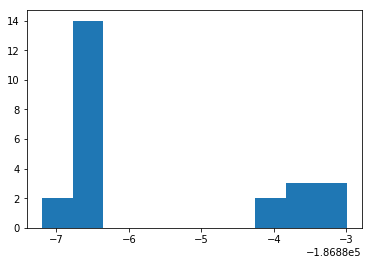

(-186887.19402, -186882.999145)

In [15]:
data = abcd.get_property('info.energy', query)
hist, bins, ax = plt.hist(data)
plt.show()
min(data), max(data)

In [16]:
query = {
    'info.config_type': 'bcc_bulk_54_high',
    'info.energy': {'$gt': -186885.0},
    'info.pbc': [True, True, True],
}
abcd.count(query)

8

In [17]:
abcd.count_properties(query)['arrays']

{'force': {'count': 1},
 'forces': {'count': 8},
 'positions': {'count': 8},
 'numbers': {'count': 8}}

## Fetching the data

In [18]:
query = {
    'info.config_type': 'bcc_bulk_54_high',
    'info.energy': {'$gt': -186885.0},
    'info.pbc': [True, True, True],
    'arrays.force': {'$exists': True}
}
abcd.count(query)

1

In [23]:
traj = list(abcd.get_atoms(query))

In [24]:
traj

[Atoms(symbols='', pbc=False, _id=..., arrays=..., derived=..., info=...)]

## Extra

In [21]:
abcd.db.atoms.count_documents({'arrays.numbers':{'$all': [26, 74]}})

0

In [22]:
abcd.db.atoms.count_documents({'arrays.numbers':{'$in': [26, 74]}})

24